In [79]:
import pandas as pd

# Load the data
data = pd.read_csv('/mnt/d/coding/codes/ML/2022-23/week 4/handout-solutions/GuoData.csv')

# Display the first few rows of the dataframe
data.head()

,Unnamed: 0,Actb,Ahcy,Aqp3,Atp12a,Bmp4,Cdx2,Creb312,Cebpa,Dab2,...,Sox2,Sall4,Sox17,Snail,Sox13,Tcfap2a,Tcfap2c,Tcf23,Utf1,Tspan8
0,1,-0.541050,1.203007,-1.030746,-1.064808,-0.494782,0.167143,1.369092,-1.083061,-0.668057,...,1.351757,1.793476,-0.783185,1.408063,0.031991,0.351257,1.078982,-0.942981,-1.348892,1.051999
1,1,-0.680832,1.355306,-2.456375,-1.234350,-0.645494,-1.003868,1.207595,-1.208023,-0.800388,...,1.363533,1.782172,-1.532477,1.361172,0.501715,-1.082362,0.930112,-1.064399,-1.469397,0.996275
2,1,-1.056038,1.280447,-2.046133,-1.439795,-0.828121,-0.983404,1.460032,-1.359447,-0.530701,...,1.296802,1.567402,-3.194157,1.301777,0.445219,-0.031284,1.005767,-1.211529,-1.615421,0.651393
3,1,-0.732331,1.326911,-2.464234,-1.244323,-0.654359,-0.947023,1.265609,-1.215373,-0.765212,...,1.684100,1.915556,-2.962515,1.349710,-1.875957,-1.699892,1.059458,-1.071541,-1.476485,0.699586
4,1,-0.629333,1.244308,-1.316815,-1.304162,-0.707552,-1.429070,0.895578,0.007785,-0.644606,...,1.304653,1.761825,-1.265379,1.320533,0.609864,-0.413826,0.888624,-1.114394,-1.519017,0.798985


## Visualization

/tmp/ipykernel_1423/1452153998.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('tab10', len(unique_cell_types))
/tmp/ipykernel_1423/1452153998.py:37: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(subset['PC1'], subset['PC2'], label=str(cell_type), cmap=colormap, color=colormap(idx))


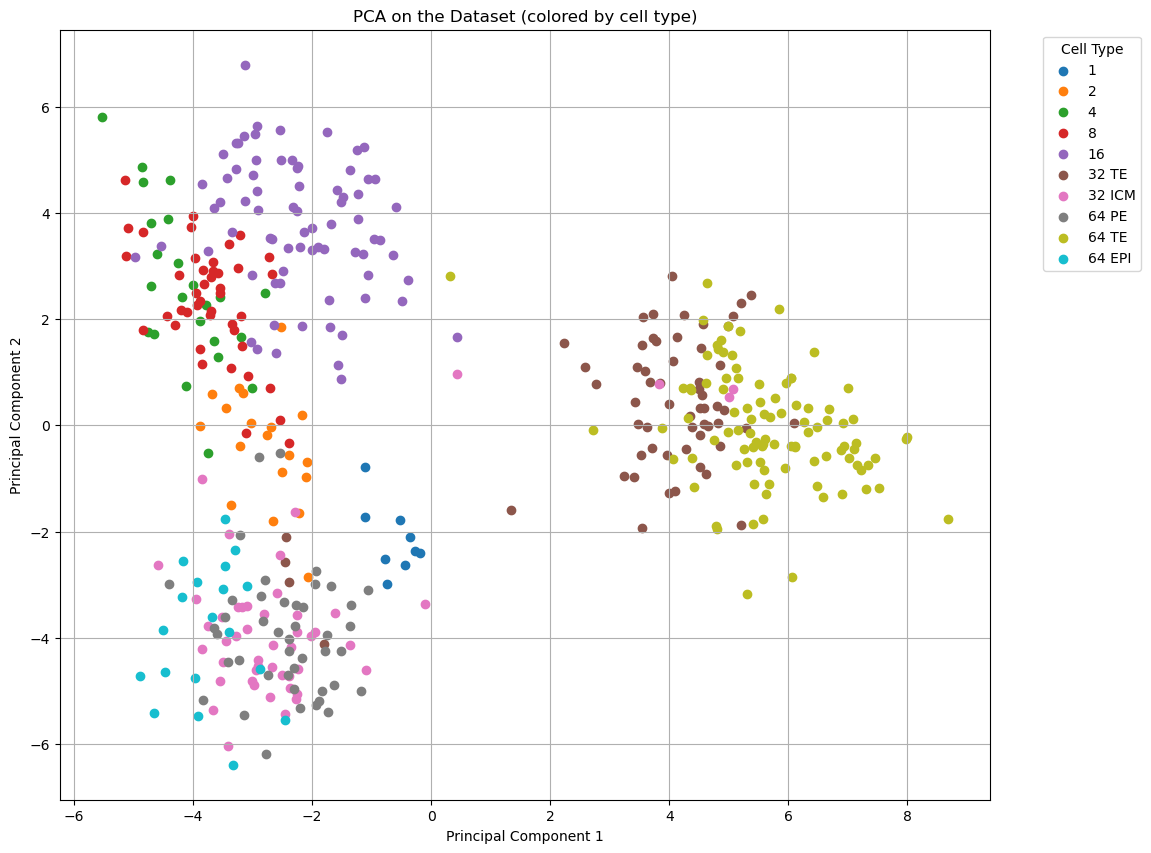

In [80]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Extract cell labels
cell_labels = data['Unnamed: 0']

# Dropping the unnamed column
data = data.drop(columns=["Unnamed: 0"])

# Standardize the feature matrix
data_std = StandardScaler().fit_transform(data)

# Create a PCA instance: pca
pca = PCA(n_components=2)

# Fit and transform the standardized data
principalComponents = pca.fit_transform(data_std)

# Create a dataframe with the first two principal components
PCA_df = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])

# Add the cell labels to the PCA dataframe
PCA_df['Cell Type'] = cell_labels

PCA_df.head()

# Checking the unique cell types present in the dataset
unique_cell_types = PCA_df['Cell Type'].unique()

# Define a colormap to ensure distinct colors
colormap = plt.cm.get_cmap('tab10', len(unique_cell_types))

plt.figure(figsize=(12,10))
for idx, cell_type in enumerate(unique_cell_types):
    subset = PCA_df[PCA_df['Cell Type'] == cell_type]
    plt.scatter(subset['PC1'], subset['PC2'], label=str(cell_type), cmap=colormap, color=colormap(idx))
plt.title('PCA on the Dataset (colored by cell type)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cell Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()




In [81]:
import numpy as np
# Create a PCA instance: pca
pca = PCA()

# Fit the standardized data
pca.fit(data_std)

# Calculate cumulative sum of explained variances
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components for more than 80% variance
num_components = np.where(cumulative_variance > 0.8)[0][0] + 1  # Adding 1 as indexing starts from 0

num_components

11

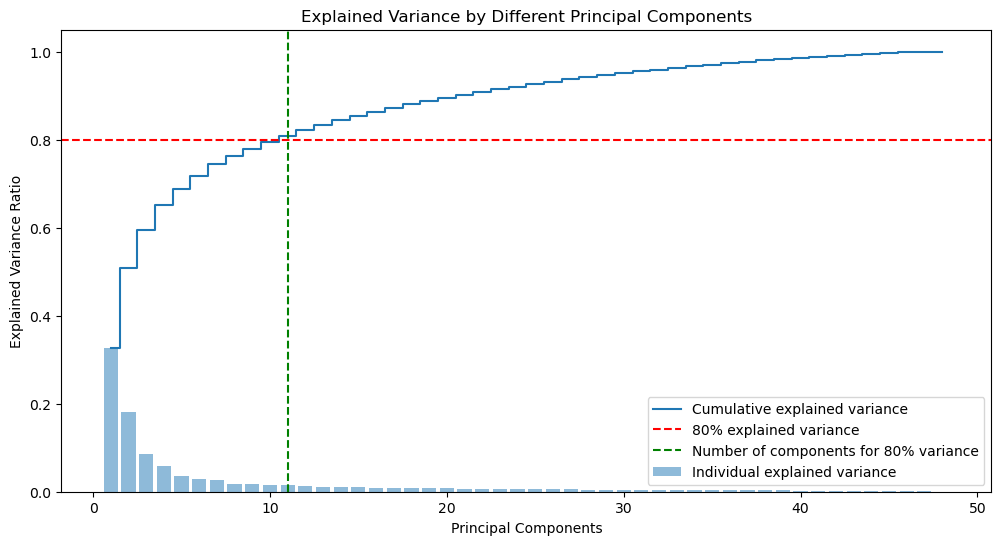

In [82]:
plt.figure(figsize=(12,6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative explained variance')
plt.axhline(y=0.8, color='r', linestyle='--', label='80% explained variance')
plt.axvline(x=num_components, color='g', linestyle='--', label='Number of components for 80% variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc='best')
plt.title('Explained Variance by Different Principal Components')
plt.show()


- The **blue bars** represent the variance explained by each principal component.
  
- The **orange line** represents the cumulative explained variance.
  
- The **red dashed line** marks the 80% variance explained threshold.
  
- The **green dashed line** indicates the number of principal components (11) required to reach the 80% threshold.
  
- As observed, the first few principal components contribute a large portion of the total variance, while the later components explain a smaller variance.


- In the **PCA plot**, both **Principal Component 1 (PC1)** and **Principal Component 2 (PC2)** help in separating different cell types, including TE cell types (32TE and 64TE).
  
- From the scatter plot, it seems that:
  
  - **PC1** clearly separates **32TE** and **64TE** from most other cell types, especially from those located on the right side of the plot (cell types "4", "8", "16", and "32 ICM").
  
  - **PC2** also contributes to the separation but to a lesser extent compared to PC1. It provides some separation between the **64TE cells** and other types (especially **"64 EPI"** and **"64 PE"**) at the top of the plot.
  
- Therefore, based on this visualization, **PC1** seems to be the most useful for distinguishing TE cell types (32TE and 64TE) from other cell types. However, **PCA** is a linear method and may not capture the complex patterns in the data. Depending on the specific biological question, more complex methods or combinations of principal components may be more appropriate.


## 哪对组合的 PC 1,2 和 3 能够最好地将 2 细胞阶段与其余阶段分开（例如 PC 1&2、1&3 或 2&3）？

In [83]:
# Perform PCA again with 3 components this time
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(data_std)

# Create a dataframe with the first three principal components
PCA_df_3 = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3'])

# Add the cell labels to the PCA dataframe
PCA_df_3['Cell Type'] = cell_labels

PCA_df_3.head()

,PC1,PC2,PC3,Cell Type
0,-1.102578,-0.787688,4.719307,1
1,-1.113674,-1.724675,5.337998,1
2,-0.276250,-2.363237,5.136926,1
3,-0.773030,-2.517412,4.607077,1
4,-0.514028,-1.778956,5.076129,1


/tmp/ipykernel_1423/513176829.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(subset[pc1], subset[pc2], label=str(cell), cmap=colormap, color=colormap(idx))


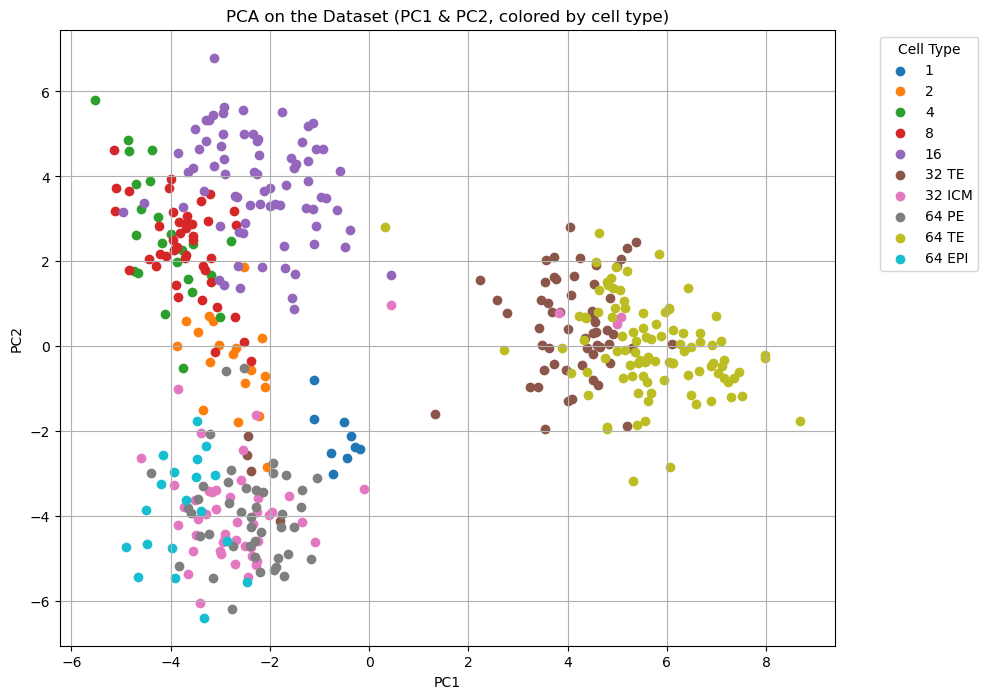

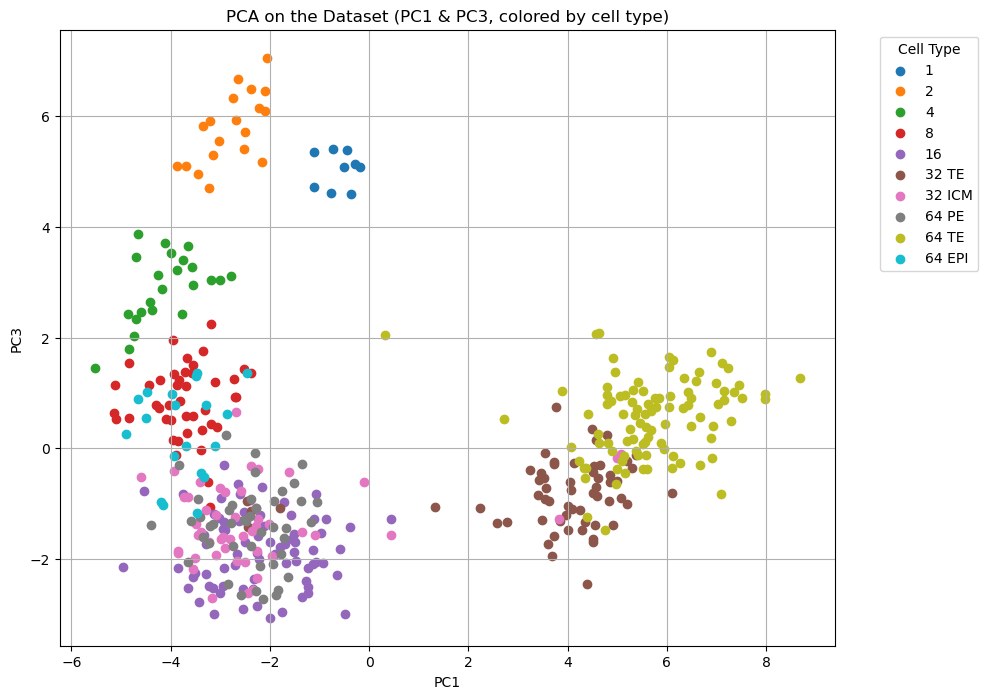

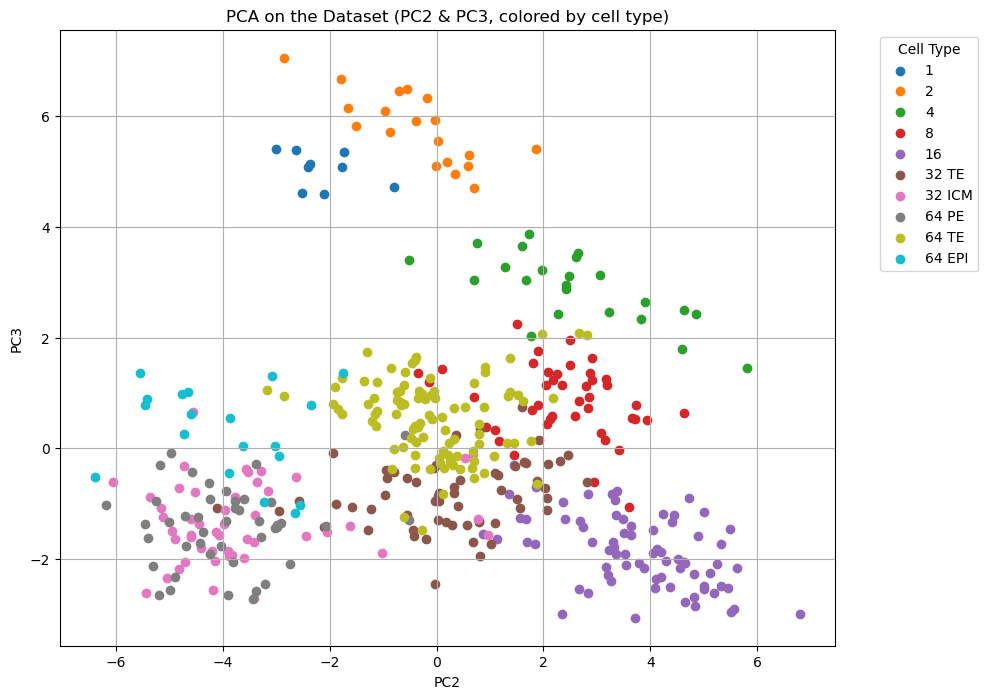

In [84]:

# Define a function to create scatter plots for different pairs of PCs
def create_scatter_plot(pc1, pc2, df, cell_type, colormap):
    unique_cell_types = df[cell_type].unique()
    for idx, cell in enumerate(unique_cell_types):
        subset = df[df[cell_type] == cell]
        plt.scatter(subset[pc1], subset[pc2], label=str(cell), cmap=colormap, color=colormap(idx))
    plt.xlabel(pc1)
    plt.ylabel(pc2)
    plt.legend(title=cell_type, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()

# Create scatter plots for different pairs of PCs
plt.figure(figsize=(10,8))
plt.title('PCA on the Dataset (PC1 & PC2, colored by cell type)')
create_scatter_plot('PC1', 'PC2', PCA_df_3, 'Cell Type', colormap)

plt.figure(figsize=(10,8))
plt.title('PCA on the Dataset (PC1 & PC3, colored by cell type)')
create_scatter_plot('PC1', 'PC3', PCA_df_3, 'Cell Type', colormap)

plt.figure(figsize=(10,8))
plt.title('PCA on the Dataset (PC2 & PC3, colored by cell type)')
create_scatter_plot('PC2', 'PC3', PCA_df_3, 'Cell Type', colormap)


- The above figure shows different cell types in the space defined by various principal components: **PC1 and PC2**, **PC1 and PC3**, and **PC2 and PC3**. Each cell type is represented by a different color.
  
- Upon visual inspection, it seems that the combination of **PC1 and PC3** provides the clearest separation of the "2" cell stage from the other stages. This conclusion is based on the observation that the data points for the "2" cell stage (orange) are largely separated from other points along the **PC3 axis**.


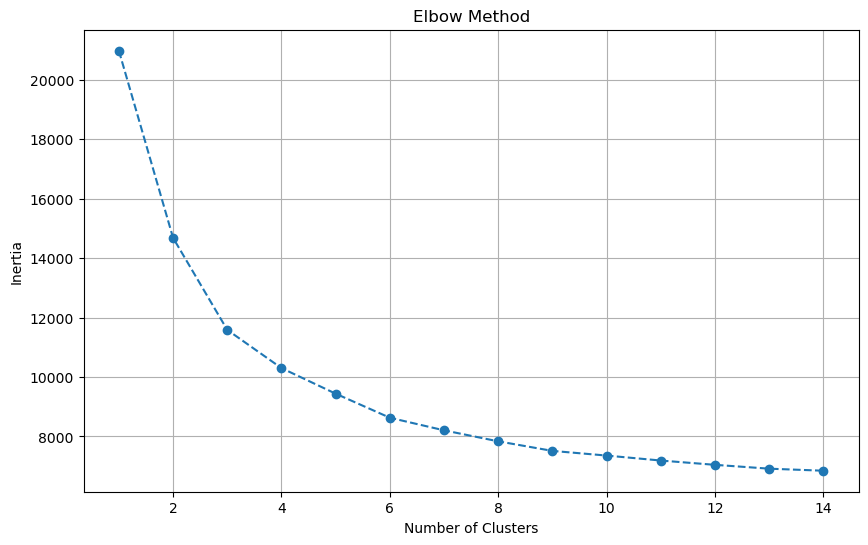

In [90]:
# 重新导入必要的库
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 重新加载并预处理数据

# 加载 CSV 数据
guo_data = pd.read_csv("/mnt/d/coding/codes/ML/2022-23/week 4/handout-solutions/GuoData.csv")

# 删除不必要的列
guo_data = guo_data.drop(columns=["Unnamed: 0"])

# 检查是否有缺失值
missing_values = guo_data.isnull().sum().sum()

# 标准化数据
if missing_values == 0:
    scaler = StandardScaler()
    guo_data_standardized = scaler.fit_transform(guo_data)
else:
    guo_data_standardized = None

# 打印缺失值数量和标准化后的数据
missing_values, guo_data_standardized

# 使用肘部法则确定最佳聚类数
inertia = []
clusters_range = range(1, 15)  # 检查最多 14 个聚类

for cluster_num in clusters_range:
    kmeans = KMeans(n_clusters=cluster_num,  n_init=10)
    kmeans.fit(guo_data_standardized)
    inertia.append(kmeans.inertia_)

# 绘制肘部曲线
plt.figure(figsize=(10, 6))
plt.plot(clusters_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [86]:
# Re-applying KMeans with 3 clusters due to the interrupted state
kmeans = KMeans(n_clusters=3 , n_init=10)
guo_data_clusters = kmeans.fit_predict(guo_data_standardized)

# Add the cluster labels to the original data for further analysis
guo_data["Cluster"] = guo_data_clusters

# Display the first few rows of the data with cluster labels
guo_data.head()

,Actb,Ahcy,Aqp3,Atp12a,Bmp4,Cdx2,Creb312,Cebpa,Dab2,DppaI,...,Sall4,Sox17,Snail,Sox13,Tcfap2a,Tcfap2c,Tcf23,Utf1,Tspan8,Cluster
0,-0.541050,1.203007,-1.030746,-1.064808,-0.494782,0.167143,1.369092,-1.083061,-0.668057,1.553758,...,1.793476,-0.783185,1.408063,0.031991,0.351257,1.078982,-0.942981,-1.348892,1.051999,1
1,-0.680832,1.355306,-2.456375,-1.234350,-0.645494,-1.003868,1.207595,-1.208023,-0.800388,1.435306,...,1.782172,-1.532477,1.361172,0.501715,-1.082362,0.930112,-1.064399,-1.469397,0.996275,1
2,-1.056038,1.280447,-2.046133,-1.439795,-0.828121,-0.983404,1.460032,-1.359447,-0.530701,1.340283,...,1.567402,-3.194157,1.301777,0.445219,-0.031284,1.005767,-1.211529,-1.615421,0.651393,1
3,-0.732331,1.326911,-2.464234,-1.244323,-0.654359,-0.947023,1.265609,-1.215373,-0.765212,1.431401,...,1.915556,-2.962515,1.349710,-1.875957,-1.699892,1.059458,-1.071541,-1.476485,0.699586,1
4,-0.629333,1.244308,-1.316815,-1.304162,-0.707552,-1.429070,0.895578,0.007785,-0.644606,1.381937,...,1.761825,-1.265379,1.320533,0.609864,-0.413826,0.888624,-1.114394,-1.519017,0.798985,1


In [87]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture

# 读取数据集
guo_data = pd.read_csv("/mnt/d/coding/codes/ML/2022-23/week 4/handout-solutions/GuoData.csv")

# 获取原始类别
labels = guo_data.iloc[:, 0]

# 获取特征数据
features = guo_data.iloc[:, 1:]

# 使用KMeans算法进行聚类
kmeans = KMeans(n_clusters=3, n_init=10).fit(features)

# 使用DBSCAN算法进行聚类
dbscan = DBSCAN(eps=0.5, min_samples=5).fit(features)

# 使用高斯混合模型进行聚类
gmm = GaussianMixture(n_components=3, covariance_type='full').fit(features)

# 获取聚类结果
kmeans_clusters = kmeans.labels_
dbscan_clusters = dbscan.labels_
gmm_clusters = gmm.predict(features)

# 将聚类结果与原始类别进行比较
kmeans_comparison = pd.DataFrame({'原始类别': labels, '聚类结果': kmeans_clusters})
dbscan_comparison = pd.DataFrame({'原始类别': labels, '聚类结果': dbscan_clusters})
gmm_comparison = pd.DataFrame({'原始类别': labels, '聚类结果': gmm_clusters})

# 统计每个聚类结果中出现次数最多的前三个原始类别
for cluster in kmeans_comparison['聚类结果'].unique():
    counts = kmeans_comparison['原始类别'][kmeans_comparison['聚类结果'] == cluster].value_counts()
    max_counts = counts.nlargest(3)
    max_labels = max_counts.index.tolist()
    max_counts = max_counts.tolist()
    print(f'KMeans聚类结果{cluster}中，出现原始类别{max_labels}的次数分别是{max_counts}')

for cluster in dbscan_comparison['聚类结果'].unique():
    counts = dbscan_comparison['原始类别'][dbscan_comparison['聚类结果'] == cluster].value_counts()
    max_counts = counts.nlargest(3)
    max_labels = max_counts.index.tolist()
    max_counts = max_counts.tolist()
    print(f'DBSCAN聚类结果{cluster}中，出现原始类别{max_labels}的次数分别是{max_counts}')

for cluster in gmm_comparison['聚类结果'].unique():
    counts = gmm_comparison['原始类别'][gmm_comparison['聚类结果'] == cluster].value_counts()
    max_counts = counts.nlargest(3)
    max_labels = max_counts.index.tolist()
    max_counts = max_counts.tolist()
    print(f'高斯混合模型聚类结果{cluster}中，出现原始类别{max_labels}的次数分别是{max_counts}')

KMeans聚类结果0中，出现原始类别['32 ICM', '64 PE', '64 EPI']的次数分别是[45, 44, 19]
KMeans聚类结果1中，出现原始类别['16', '8', '4']的次数分别是[75, 43, 23]
KMeans聚类结果2中，出现原始类别['64 TE', '32 TE', '32 ICM']的次数分别是[95, 56, 3]
DBSCAN聚类结果-1中，出现原始类别['64 TE', '16', '32 TE']的次数分别是[96, 75, 60]
高斯混合模型聚类结果1中，出现原始类别['32 ICM', '64 PE', '64 EPI']的次数分别是[45, 44, 19]
高斯混合模型聚类结果0中，出现原始类别['16', '8', '4']的次数分别是[75, 43, 23]
高斯混合模型聚类结果2中，出现原始类别['64 TE', '32 TE', '32 ICM']的次数分别是[95, 56, 3]


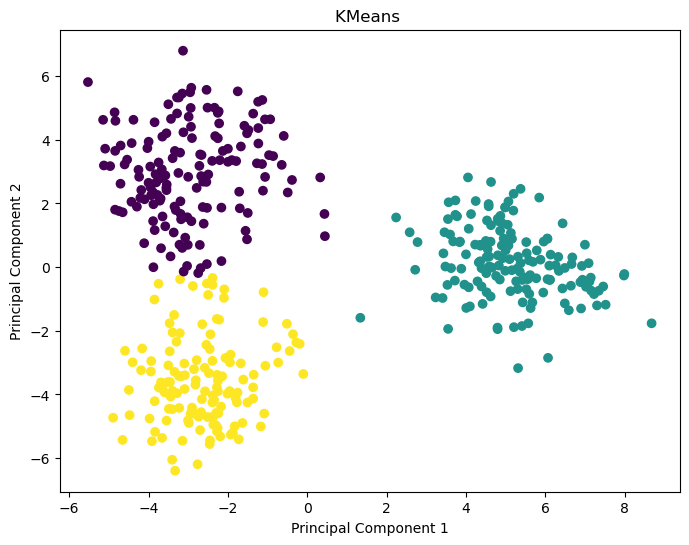

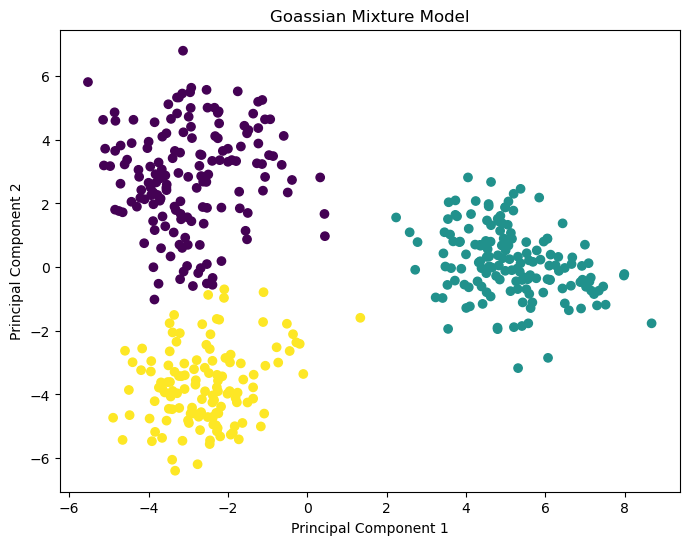

In [88]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt



# 使用PCA进行降维
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features)


# 使用KMeans算法进行聚类
kmeans = KMeans(n_clusters=3, n_init=10).fit(reduced_features)

# 使用高斯混合模型进行聚类
gmm = GaussianMixture(n_components=3, covariance_type='full').fit(reduced_features)

# 获取聚类结果
kmeans_clusters = kmeans.labels_
gmm_clusters = gmm.predict(reduced_features)

# 将聚类结果与原始类别进行比较
kmeans_comparison = pd.DataFrame({'原始类别': labels, '聚类结果': kmeans_clusters})
gmm_comparison = pd.DataFrame({'原始类别': labels, '聚类结果': gmm_clusters})

# 绘制KMeans聚类结果的散点图
plt.figure(figsize=(8, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=kmeans_clusters)
plt.title('KMeans ')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# 绘制高斯混合模型聚类结果的散点图
plt.figure(figsize=(8, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=gmm_clusters)
plt.title('Goassian Mixture Model')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()



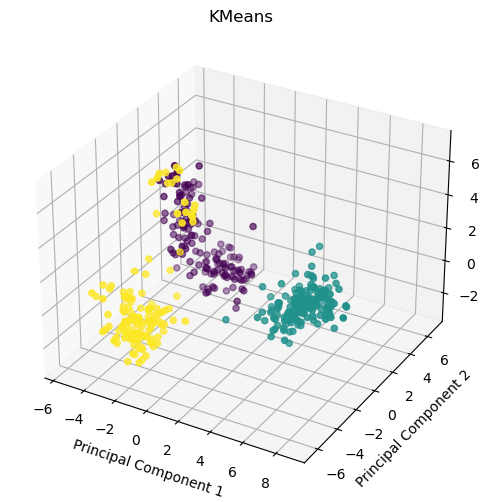

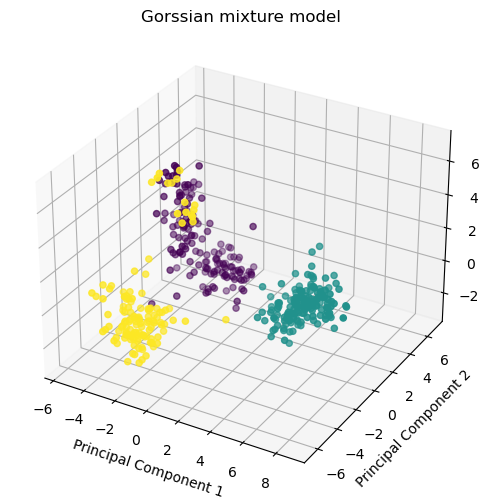

In [89]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 使用PCA进行降维
pca = PCA(n_components=3)
reduced_features = pca.fit_transform(features)

# 绘制KMeans聚类结果的三维散点图
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reduced_features[:, 0], reduced_features[:, 1], reduced_features[:, 2], c=kmeans_clusters)
ax.set_title('KMeans')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

# 绘制高斯混合模型聚类结果的三维散点图
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reduced_features[:, 0], reduced_features[:, 1], reduced_features[:, 2], c=gmm_clusters)
ax.set_title('Gorssian mixture model')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()